In [1]:
from pathlib import Path

import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import colorcet as cc
import contextily as ct

In [2]:
data_folder = Path('../../data')

In [3]:
fiona.listlayers(f'{data_folder}/india_admin_areas.geojson')

['india_admin_areas']

In [4]:
states = gpd.read_file(f'{data_folder}/india_admin_areas.geojson')
states.shape

(759, 7)

In [5]:
states.head(1)

,id,district,dt_code,st_nm,st_code,year,geometry
0,None,Aizawl,261,Mizoram,15,2011_c,"POLYGON ((93.04466 23.41052, 92.9468 23.51363,..."


In [6]:
states = states.dissolve(by='st_nm').reset_index()
states.shape

(36, 7)

In [7]:
states.head(1)

,st_nm,geometry,id,district,dt_code,st_code,year
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((92.79235 9.23818, 92.82599 9.1...",Andaman and Nicobar Islands,North and Middle Andaman,639,35,2011_c


In [8]:
print(states.crs)

EPSG:4326


In [9]:
states = states.to_crs('EPSG:7755')
print(states.crs)

EPSG:7755


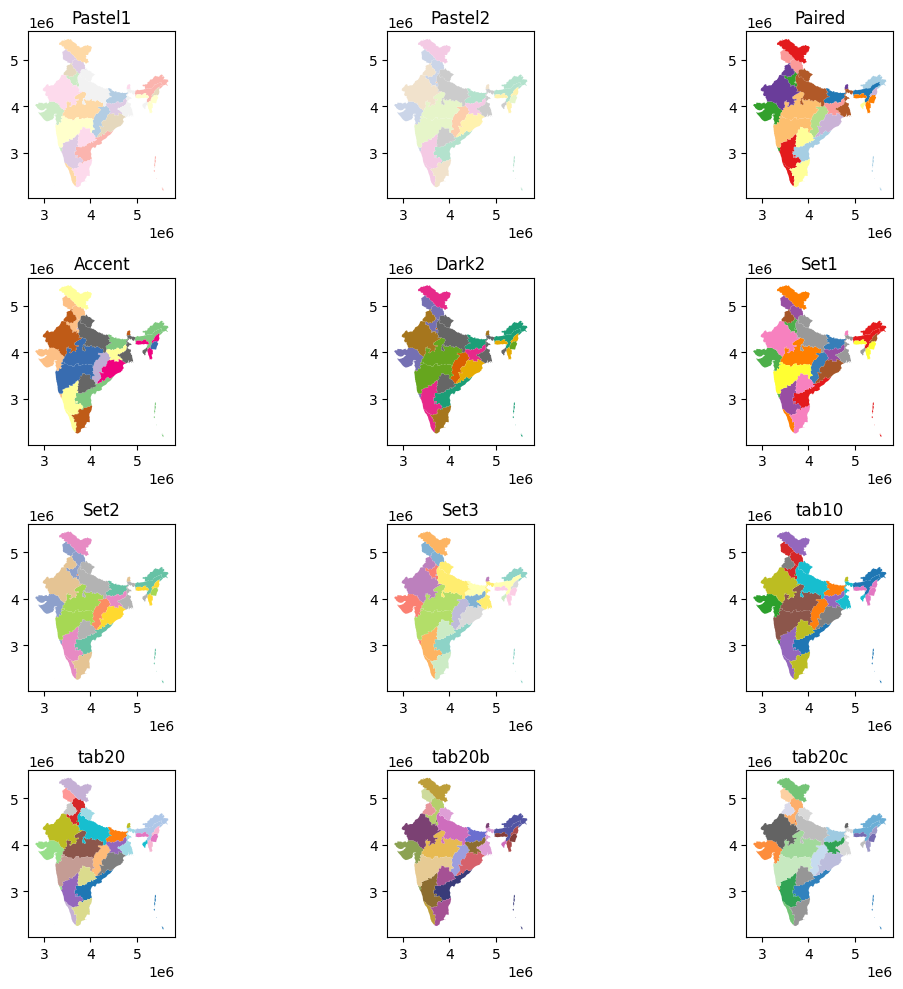

In [10]:
cmaps = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
        'Dark2', 'Set1', 'Set2', 'Set3',
        'tab10', 'tab20', 'tab20b', 'tab20c']

fig_1, axes_1 = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
ax_1 = axes_1.flatten()

for ax, cmap in zip(ax_1, cmaps):
    states.plot(ax=ax, cmap=cmap)
    ax.set_title(cmap)

plt.tight_layout()
plt.show()

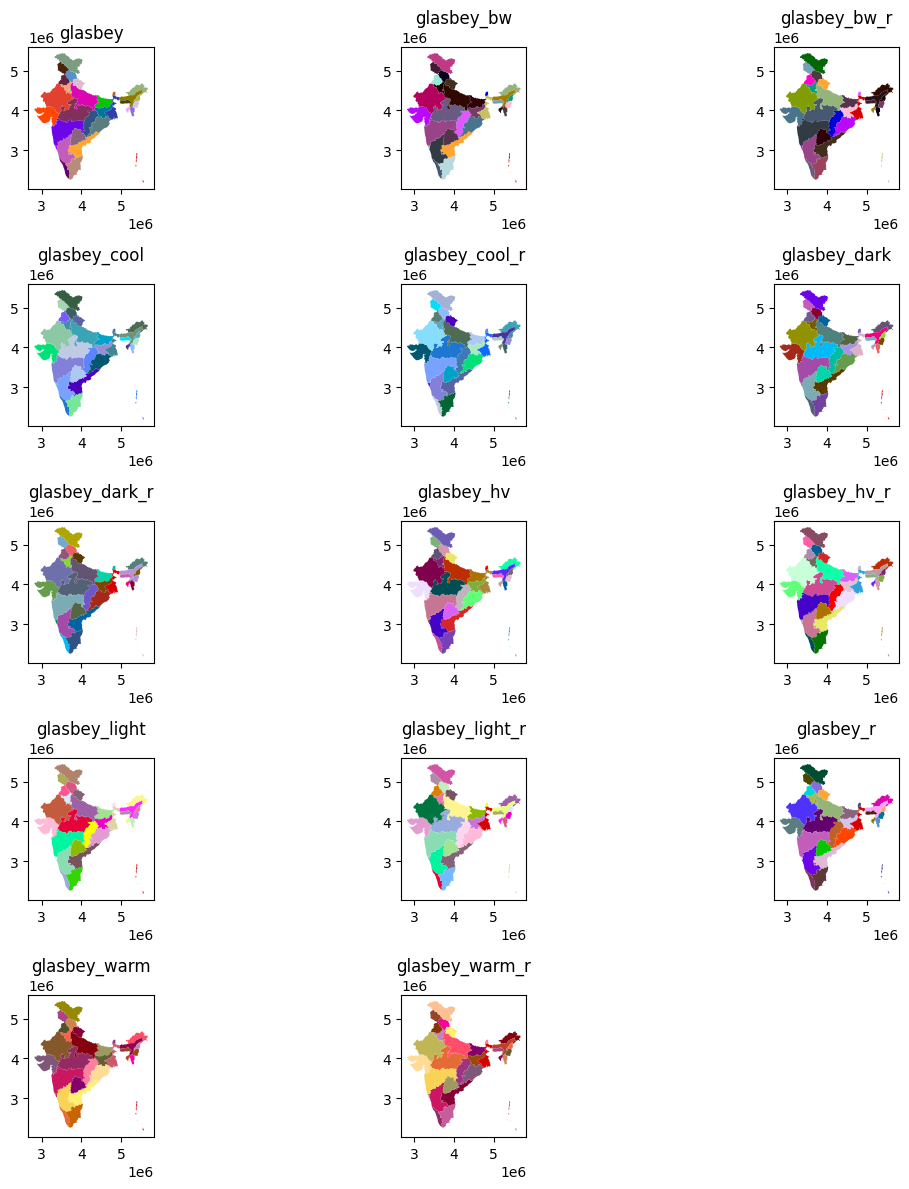

In [11]:
cmaps = ['glasbey', 'glasbey_bw', 'glasbey_bw_r', 'glasbey_cool', 
'glasbey_cool_r', 'glasbey_dark', 'glasbey_dark_r', 'glasbey_hv',
'glasbey_hv_r', 'glasbey_light', 'glasbey_light_r', 'glasbey_r',
'glasbey_warm', 'glasbey_warm_r']

fig_2, axes_2 = plt.subplots(nrows=5, ncols=3, figsize=(12,12))
ax_2 = axes_2.flatten()

for ax, cmap in zip(ax_2, cmaps):
    states.plot(ax=ax, cmap=cc.cm[cmap])
    ax.set_title(cmap)

for ax in ax_2[len(cmaps):]:
    fig_2.delaxes(ax)

plt.tight_layout()
plt.show()

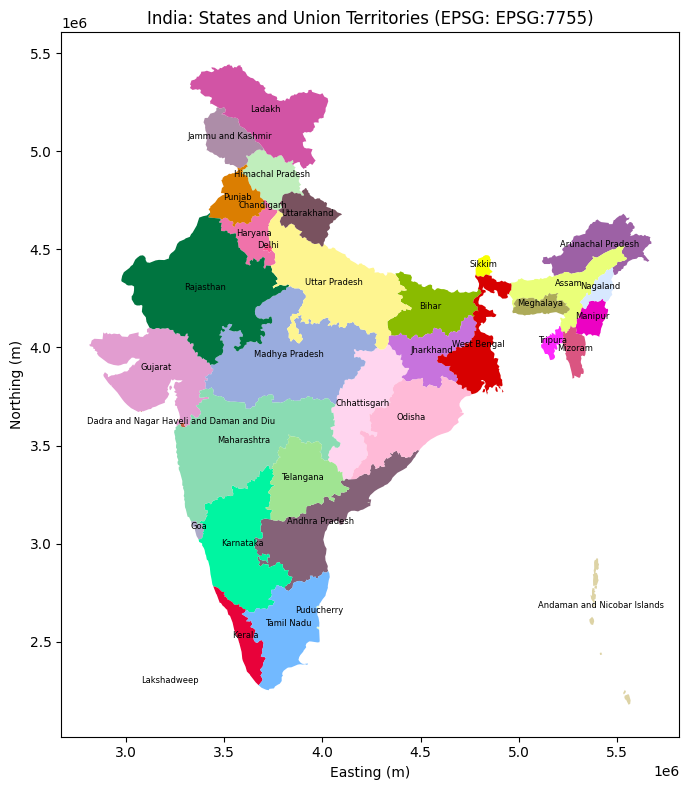

In [12]:
fig_3, ax_3 = plt.subplots(figsize=(10,8))
states.plot(ax=ax_3, cmap=cc.cm.glasbey_light_r)

for row in states.itertuples():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row.st_nm

    if label in ['Chandigarh']:
        y -= 25000
    ax_3.annotate(label, xy=(x,y), fontsize=6, ha='center')

ax_3.set_title(f'India: States and Union Territories (EPSG: {states.crs})')
ax_3.set_xlabel('Easting (m)')
ax_3.set_ylabel('Northing (m)')
    
plt.tight_layout()
plt.show()

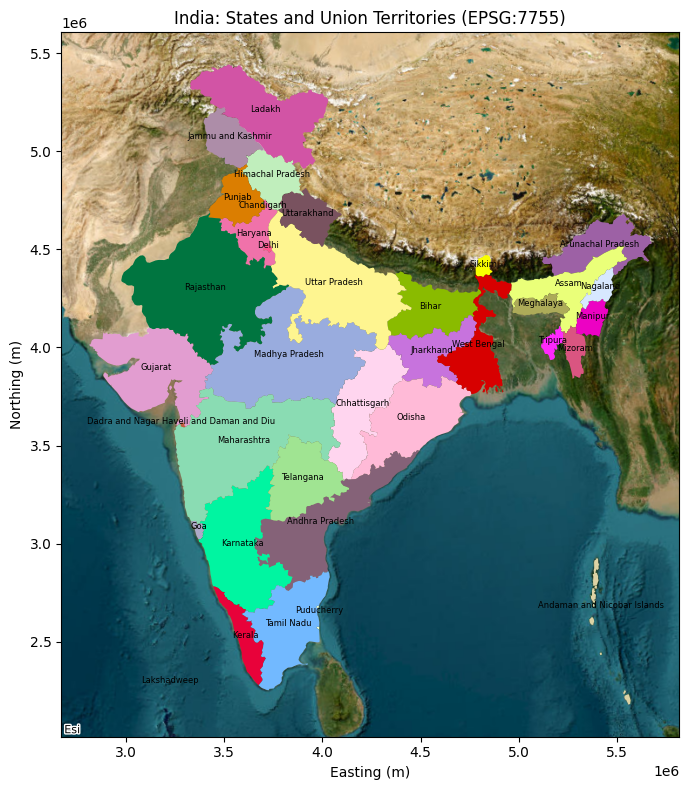

In [13]:
fig_4, ax_4 = plt.subplots(figsize=(10,8))
states.plot(ax=ax_4, cmap=cc.cm.glasbey_light_r)

basemap = ct.providers.Esri.WorldImagery.copy()
basemap['attribution'] = 'Esi'
ct.add_basemap(ax=ax_4, crs=states.crs, source=basemap)

for row in states.itertuples():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row.st_nm

    if label in ['Chandigarh']:
        y -= 25000
    ax_4.annotate(label, xy=(x,y), fontsize=6, ha='center')

ax_4.set_title(f"India: States and Union Territories ({states.crs})")
ax_4.set_xlabel('Easting (m)')
ax_4.set_ylabel('Northing (m)')

plt.tight_layout()
plt.show()